In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


In [3]:
df = gpd.read_parquet('out/analytics_frame.parquet')
df['day'] = df['hour'].dt.dayofyear
df['hour_part'] = df['hour'].dt.hour

In [39]:
df

,hour,pid,stpid,p_stp_id,geometry,bus_per_hour,wait_time_minutes,rt,year,month,day,hour_part
0,2023-01-03 05:00:00,4096,1106,4096-1106,POINT (358827.53306 579403.50762),1,60.0,20,2023,1,3,5
1,2023-01-03 05:00:00,4096,14467,4096-14467,POINT (356899.61852 579209.01312),1,60.0,20,2023,1,3,5
2,2023-01-03 05:00:00,4096,14765,4096-14765,POINT (356097.14892 579181.87706),1,60.0,20,2023,1,3,5
3,2023-01-03 05:00:00,4096,14766,4096-14766,POINT (351616.59001 579067.36074),1,60.0,20,2023,1,3,5
4,2023-01-03 05:00:00,4096,14840,4096-14840,POINT (352021.55612 579082.74701),1,60.0,20,2023,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
102396612,2023-12-29 10:00:00,4095,482,4095-482,POINT (351859.35657 579071.67868),1,60.0,20,2023,12,363,10
102396613,2023-12-29 10:00:00,4095,484,4095-484,POINT (351423.98989 579070.41076),1,60.0,20,2023,12,363,10
102396614,2023-12-29 10:00:00,4095,485,4095-485,POINT (351269.66750 579060.41242),1,60.0,20,2023,12,363,10
102396615,2023-12-29 10:00:00,4095,486,4095-486,POINT (350818.41466 579051.95843),1,60.0,20,2023,12,363,10


/var/folders/vk/_03tl7qs1sv80_pgkhd8bxch0000gn/T/ipykernel_59515/1806556606.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Month')


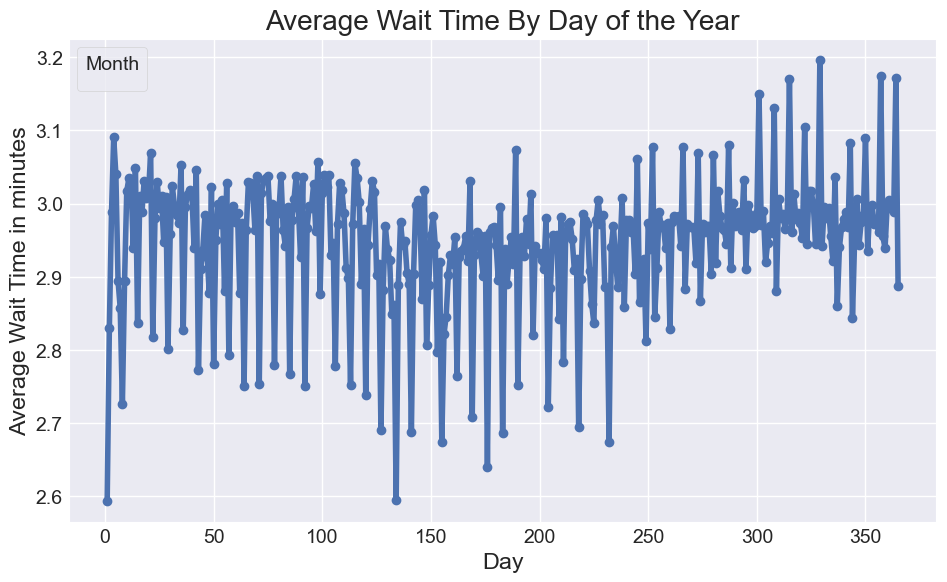

In [38]:
# By day of the year

by_day = df.groupby(['day'])['bus_per_hour'].mean().reset_index(name = 'avg_bus_per_hour')
by_day['avg_wait_time'] = 60 / by_day['avg_bus_per_hour']

days = df['day'].unique()

plt.figure(figsize=(10, 6))

plt.plot(by_day['day'], by_day['avg_bus_per_hour'], marker='o')

plt.xlabel('Day')
plt.ylabel('Average Wait Time in minutes')
plt.title('Average Wait Time By Day of the Year')
plt.grid(True)
plt.show()

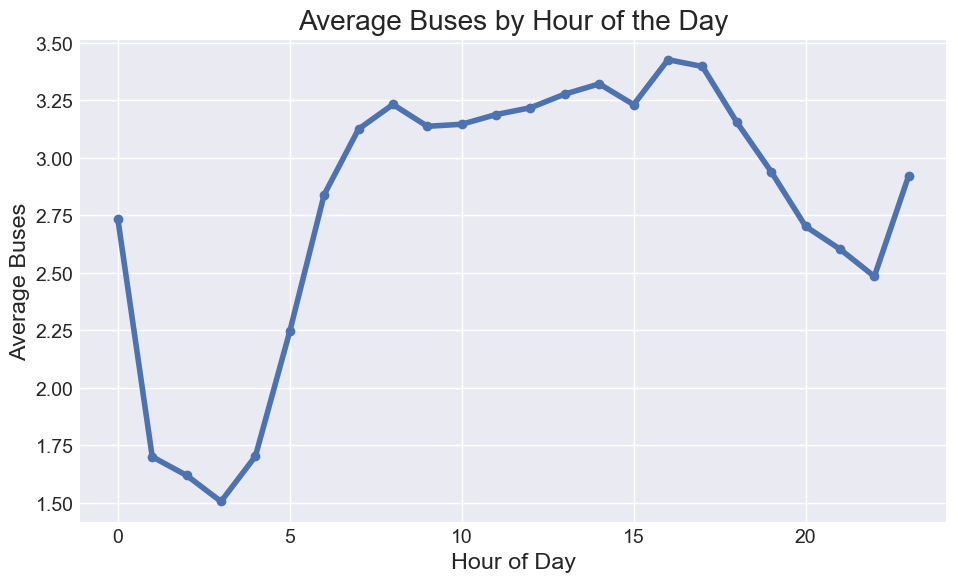

In [35]:
# by hour of the day
by_hour = df.groupby(['hour_part'])['bus_per_hour'].mean().reset_index(name = 'avg_bus_per_hour')
by_hour['avg_wait_time'] = 60 / by_hour['avg_bus_per_hour']

plt.figure(figsize=(10, 6))

plt.plot(by_hour['hour_part'], by_hour['avg_bus_per_hour'], marker='o')

plt.xlabel('Hour of Day')
plt.ylabel('Average Buses')
plt.title('Average Buses by Hour of the Day')
plt.grid(True)
plt.show()

In [11]:
df.groupby(['rt'])['bus_per_hour'].mean().reset_index(name = 'avg_bus_per_hour').sort_values('avg_bus_per_hour', ascending=False).tail()

,rt,avg_bus_per_hour
48,31,1.882627
35,192,1.758440
61,5,1.659632
39,206,1.622776
31,169,1.219456


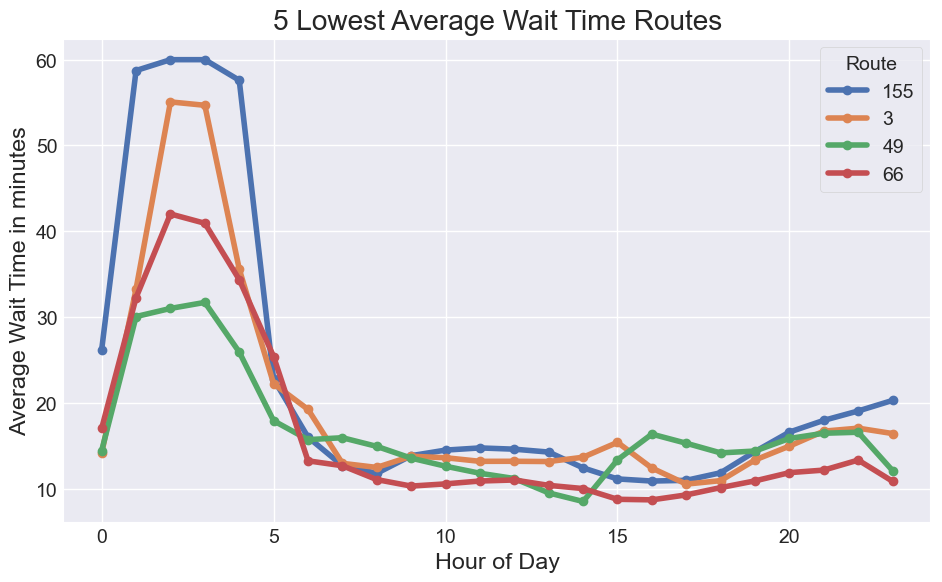

In [41]:
# 5 routes with the lowest average wait time by hour

fastest = ['66', '49', '3', '155']
df_fastest = df[df['rt'].isin(fastest)]
df_fastest = df_fastest.groupby(['rt', 'hour_part'])['bus_per_hour'].mean().reset_index(name = 'avg_bus_per_hour')
df_fastest['avg_wait_time'] = 60 / df_fastest['avg_bus_per_hour']

rts = df_fastest['rt'].unique()

plt.figure(figsize=(10, 6))

# Plot a line for each month
for rt in rts:
    subset = df_fastest[df_fastest['rt'] == rt]
    plt.plot(subset['hour_part'], subset['avg_wait_time'], marker='o', label=rt)

plt.xlabel('Hour of Day')
plt.ylabel('Average Wait Time in minutes')
plt.title('5 Lowest Average Wait Time Routes')
plt.legend(title='Route')
plt.grid(True)
plt.show()

In [43]:
df_fastest.head(20)

,rt,hour_part,avg_bus_per_hour,avg_wait_time
0,155,0,2.289388,26.207874
1,155,1,1.021522,58.735892
2,155,2,1.000000,60.000000
3,155,3,1.000000,60.000000
4,155,4,1.041638,57.601592
5,155,5,2.634147,22.777768
6,155,6,3.747966,16.008681
7,155,7,4.727689,12.691190
8,155,8,5.086953,11.794881
9,155,9,4.332899,13.847541


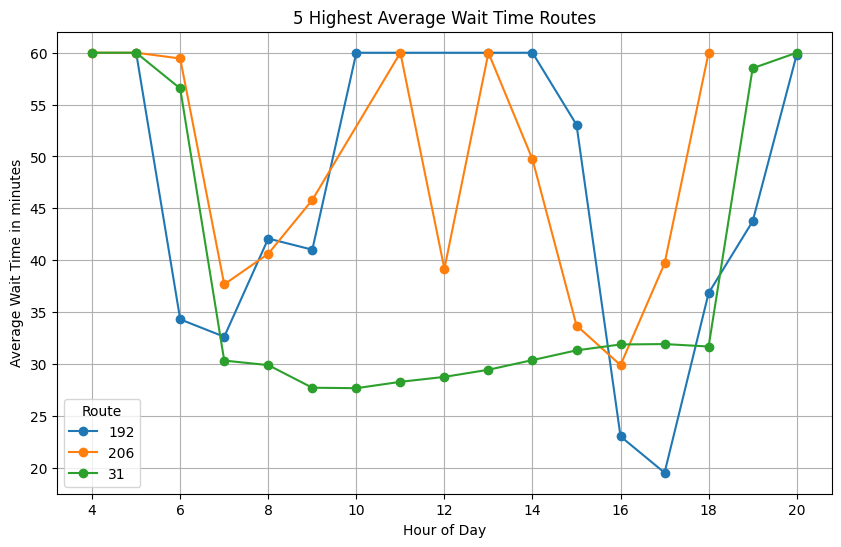

In [14]:
# 5 routes with the highest average wait time by hour


slowest = ['206' ,'192','31']
df_slowest = df[df['rt'].isin(slowest)]

df_slowest = df_slowest.groupby(['rt', 'hour_part'])['bus_per_hour'].mean().reset_index(name = 'avg_bus_per_hour')
df_slowest['avg_wait_time'] = 60 / df_slowest['avg_bus_per_hour']

rts = df_slowest['rt'].unique()

plt.figure(figsize=(10, 6))

# Plot a line for each month
for rt in rts:
    subset = df_slowest[df_slowest['rt'] == rt]
    plt.plot(subset['hour_part'], subset['avg_wait_time'], marker='o', label=rt)

plt.xlabel('Hour of Day')
plt.ylabel('Average Wait Time in minutes')
plt.title('Sample of Highest Average Wait Time Routes')
plt.legend(title='Route')
plt.grid(True)
plt.show()

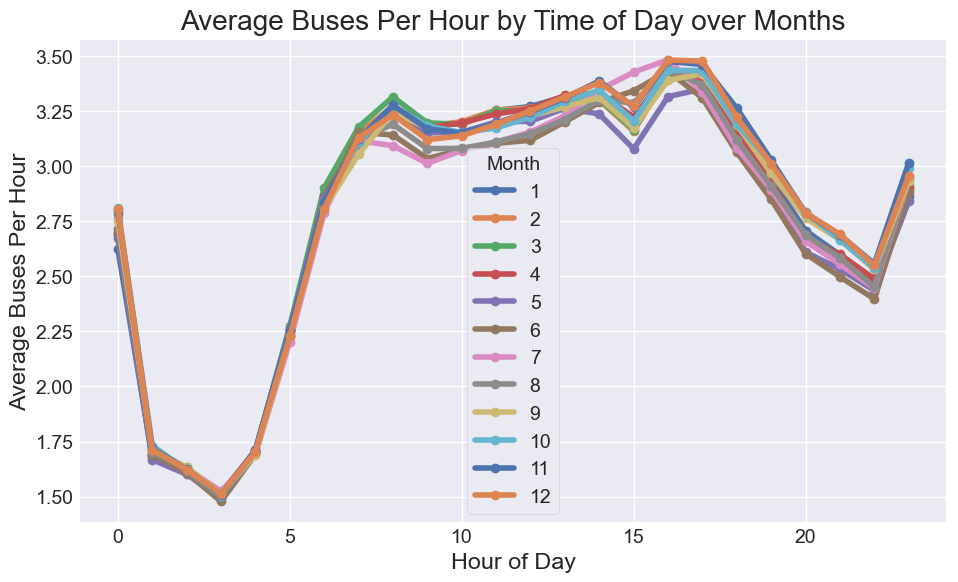

In [37]:
# Average Wait Time by Time of Day over Time
by_month = df.groupby(['month', 'hour_part'])['bus_per_hour'].mean().reset_index(name = 'avg_bus_per_hour')
by_month['avg_wait_time'] = 60 / by_month['avg_bus_per_hour']
months = by_month['month'].unique()

plt.figure(figsize=(10, 6))

# Plot a line for each month
for m in months:
    subset = by_month[by_month['month'] == m]
    plt.plot(subset['hour_part'], subset['avg_bus_per_hour'], marker='o', label=m)

plt.xlabel('Hour of Day')
plt.ylabel('Average Buses Per Hour')
plt.title('Average Buses Per Hour by Time of Day over Months')
plt.legend(title='Month')
plt.grid(True)
plt.show()

In [16]:
df.head()

,hour,pid,stpid,p_stp_id,geometry,bus_per_hour,wait_time_minutes,rt,year,month,day,hour_part
0,2023-01-03 05:00:00,4096,1106,4096-1106,POINT (358827.53306 579403.50762),1,60.0,20,2023,1,3,5
1,2023-01-03 05:00:00,4096,14467,4096-14467,POINT (356899.61852 579209.01312),1,60.0,20,2023,1,3,5
2,2023-01-03 05:00:00,4096,14765,4096-14765,POINT (356097.14892 579181.87706),1,60.0,20,2023,1,3,5
3,2023-01-03 05:00:00,4096,14766,4096-14766,POINT (351616.59001 579067.36074),1,60.0,20,2023,1,3,5
4,2023-01-03 05:00:00,4096,14840,4096-14840,POINT (352021.55612 579082.74701),1,60.0,20,2023,1,3,5


In [17]:
df_26 = df[df['rt'] == 26]
df_26_one_day =  df[df['day'] == 45]